In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import export_text

Function to plot training data vs predicted data

In [109]:
def plot_pred_vs_data(x,y,x_test,y_preds):
  plt.figure(1)
  plt.scatter(x,y, edgecolor="black", c="darkorange", label="data")
  for y_pred in y_preds:
    plt.plot(x_test,y_pred)
  plt.show()

# Perfect Sin function with no noise

In [112]:
x = np.arange(0,4*np.pi,0.1).reshape(-1,1)
y = np.sin(x)
sin_tree = DecisionTreeRegressor(max_depth=4).fit(x,y)
y_pred = sin_tree.predict(x)

(126, 1)
(126,)


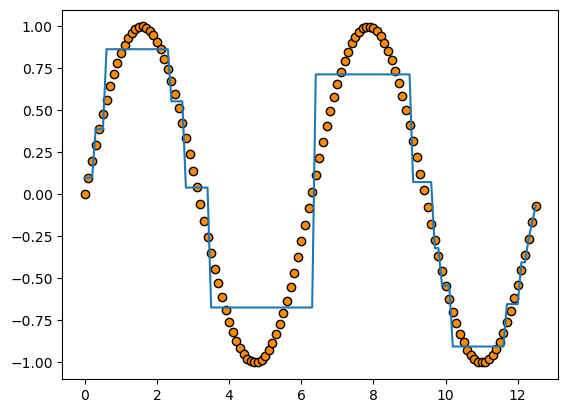

In [113]:
print(x.shape)
print(y_pred.shape)
plot_pred_vs_data(x,y,x,(y_pred,))

# Sin function with noise

In [139]:
# Create a random dataset
# rng = np.random.RandomState(1)
n_points = 80
noise_T = 5
last_value = 4 * np.pi
x_noise = np.sort(last_value * rng.rand(n_points, 1), axis=0)
y_noise = np.sin(x_noise).ravel()
y_noise[::noise_T] += 1.5 * (0.5 - rng.rand(n_points//noise_T))

X_test = np.arange(0,last_value,0.01).reshape(-1,1)

## Basic DecisionTreeRegressor

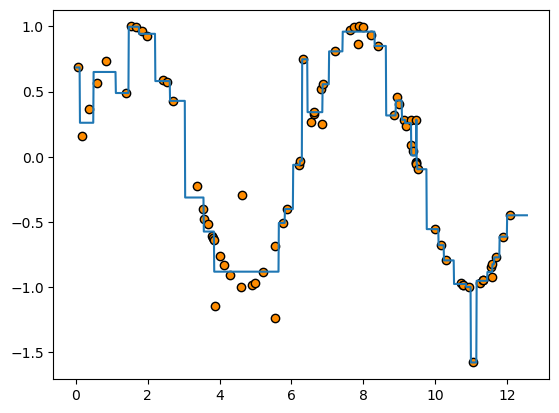

In [145]:
tree_noise = DecisionTreeRegressor(max_depth=6).fit(x_noise,y_noise)

y_pred_2 = tree_noise.predict(X_test)

plot_pred_vs_data(x_noise,y_noise,X_test,(y_pred_2,))

## Random Forrest

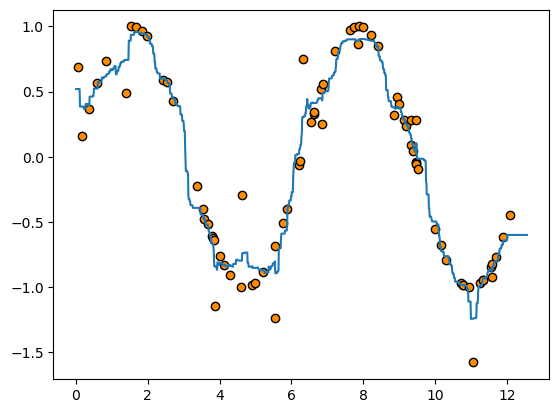

In [168]:
rf = RandomForestRegressor(n_estimators=100,max_depth=6, max_samples=0.6).fit(x_noise,y_noise)
y_pred_3 = rf.predict(X_test)

# plot_pred_vs_data(x_noise,y_noise,X_test,(y_pred_2,y_pred_3,))
plot_pred_vs_data(x_noise,y_noise,X_test,(y_pred_3,))

## Gradient Boost

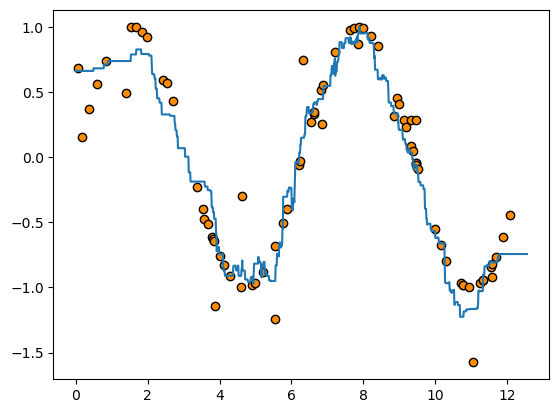

In [187]:
gb = GradientBoostingRegressor(learning_rate=0.1,
                               n_estimators=100,
                               subsample=0.05,
                               max_depth=6
                              ).fit(x_noise, y_noise)

y_pred_4 = gb.predict(X_test)

# plot_pred_vs_data(x_noise,y_noise,X_test,(y_pred_2,y_pred_3,))
plot_pred_vs_data(x_noise,y_noise,X_test,(y_pred_4,))